# Instacart market basket analysis

## Data Mining and analysis CBD-3334_1

* Andres Salguero C0932873
* Andrea Franco C0931897
* Pallavi Sathyanarayana C0935830
* Ali Sher Khan C0919397
* Uma Varadaraj C0935831




# Dataset information

The dataset is a set of relational files that contains information about customer's orders over time. This orders are from an american company called Instacart, which picks and delivers food in the US and Canada through a website and mobile app.

The dataset can be found in Kaggle [Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis/data) competition under the 'data' section.

The goal of the competition was to predict which products will be in a user's next order based on historical information of that user's orders. **How ever**, the **goal** of our project is to use the available data and engineer some features to create a dataset that is suitable to perform a regression task.

**Data information:**

* Anonymized dataset 
* Sample of over **3 millions grocery orders**
* Over 200,000 users (for each user there will be between 4 and 100 orders) 
* **CSV files:** aisles, departments, order_products_prior, order_products_train, orders, products.
* Each entity (customer, product, aisle, department) has an associated unique id and description of that id.
* Data includes:
    - sequence of products purchased in each order of each user
    - week and hour of day for each order
    - a relative measure of time between orders.

# Libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Exploratory Data Analysis

In [6]:
aisles_df = pd.read_csv("market_basket_analysis/datasets/original/aisles.csv")
order_prods_prior_df = pd.read_csv("market_basket_analysis/datasets/original/order_products__prior.csv")
order_prods_train_df = pd.read_csv("market_basket_analysis/datasets/original/order_products__train.csv")
orders_df = pd.read_csv("market_basket_analysis/datasets/original/orders.csv")
products_df = pd.read_csv("market_basket_analysis/datasets/original/products.csv")

In [5]:
print("aisles shape: ", aisles_df.shape)
print("order_prods_prior shape: ", order_prods_prior_df.shape)
print("order_prods_train shape: ", order_prods_train_df.shape)
print("orders shape: ", orders_df.shape)
print("products shape: ", products_df.shape)

aisles shape:  (134, 2)
order_prods_prior shape:  (32434489, 4)
order_prods_train shape:  (1384617, 4)
orders shape:  (3421083, 7)
products shape:  (49688, 4)


In [6]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Reduce the number of aisles 

In [7]:
aisles_df['aisle'].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

Map into 5 big categories

In [8]:
def categorize_aisle(aisle):
    fresh_foods = ['fresh fruits', 'fresh vegetables', 'fresh herbs', 'poultry counter', 'seafood counter', 'meat counter', 'fresh dips tapenades']
    packaged_foods = ['energy granola bars', 'instant foods', 'bakery desserts', 'pasta sauce', 'baking ingredients', 'bulk dried fruits vegetables', 'popcorn jerky', 'candy chocolate', 'cookies cakes', 'crackers', 'chips pretzels', 'cereal', 'dry pasta', 'grains rice dried goods', 'packaged vegetables fruits', 'trail mix snack mix', 'soup broth bouillon', 'canned meals beans', 'canned jarred vegetables', 'canned meat seafood', 'canned fruit applesauce', 'spices seasonings', 'condiments', 'granola', 'preserved dips spreads', 'salad dressing toppings']
    beverages = ['coffee', 'tea', 'juice nectars', 'soft drinks', 'water seltzer sparkling water', 'energy sports drinks', 'protein meal replacements', 'beers coolers', 'red wines', 'white wines', 'spirits', 'specialty wines champagnes', 'cocoa drink mixes', 'frozen juice']
    household_care = ['kitchen supplies', 'oral hygiene', 'soap', 'paper goods', 'shave needs', 'diapers wipes', 'trash bags liners', 'eye ear care', 'vitamins supplements', 'facial care', 'dish detergents', 'laundry', 'deodorants', 'air fresheners candles', 'baby bath body care', 'skin care', 'plates bowls cups flatware', 'cleaning products', 'first aid', 'feminine care', 'body lotions soap', 'muscles joints pain relief', 'beauty']
    frozen_refrigerated = ['frozen meat seafood', 'frozen meals', 'frozen vegan vegetarian', 'frozen breads doughs', 'frozen breakfast', 'ice cream ice', 'ice cream toppings', 'refrigerated', 'milk', 'yogurt', 'butter', 'cream', 'soy lactosefree', 'refrigerated pudding desserts', 'frozen produce', 'frozen pizza', 'frozen appetizers sides', 'frozen dessert']
    
    if aisle in fresh_foods:
        return 'Fresh Foods'
    elif aisle in packaged_foods:
        return 'Packaged Foods'
    elif aisle in beverages:
        return 'Beverages'
    elif aisle in household_care:
        return 'Household & Personal Care'
    elif aisle in frozen_refrigerated:
        return 'Frozen & Refrigerated Items'
    else:
        return 'Other'

# Apply the function to your dataframe
aisles_df['aisle_category'] = aisles_df['aisle'].apply(categorize_aisle)


In [9]:
aisles_df.head()

,aisle_id,aisle,aisle_category
0,1,prepared soups salads,Other
1,2,specialty cheeses,Other
2,3,energy granola bars,Packaged Foods
3,4,instant foods,Packaged Foods
4,5,marinades meat preparation,Other


In [10]:
aisles_df['aisle_category'].value_counts()

aisle_category
Other                          46
Packaged Foods                 26
Household & Personal Care      23
Frozen & Refrigerated Items    18
Beverages                      14
Fresh Foods                     7
Name: count, dtype: int64

In [11]:
order_prods_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
departments_df = pd.read_csv("market_basket_analysis/datasets/original/departments.csv")
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# Merge datasets

### Order-Product Details: 
First, we merge the order_products data with orders to attach order-specific information to each product ordered.

In [9]:
order_products_merged = order_prods_prior_df.merge(orders_df, on='order_id', how='left')

In [16]:
order_products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


### Add Product Information: 
Merge the order_products_merged with products to attach product-specific details.

In [10]:
order_products_merged = order_products_merged.merge(products_df, on='product_id', how='left')


In [18]:
order_products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


### Add Aisle and Department Information: 
Next, merge order_products_merged with aisles and departments to include aisle and department names.

In [11]:
order_products_merged = order_products_merged.merge(aisles_df, on='aisle_id', how='left')
order_products_merged = order_products_merged.merge(departments_df, on='department_id', how='left')


In [20]:
order_products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,aisle_category,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,Other,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,Fresh Foods,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,Packaged Foods,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,Other,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,Packaged Foods,pantry


In [21]:
order_products_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  aisle_category          object 
 15  department              object 
dtypes: float64(1), int64(10), object(5)
memory usage: 3.9+ GB


This merged dataset contains only one feature with a lot of null values: the "days_since_prior_order" feature. These values are Missing Not At Random as there are some orders that were first orders so didn't really have a days since prior order as there was no prior order, it has a specific reason tied to the data itself.

We handle this missing values by imputing a cero, indicating no days since prior order.

In [ ]:
order_products_merged.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
aisle_category                  0
department                      0
dtype: int64

In [ ]:
order_products_merged['days_since_prior_order'] = order_products_merged['days_since_prior_order'].fillna(0)

In [ ]:
order_products_merged.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
aisle_category            0
department                0
dtype: int64

# Data engineering

Based on the existing features we can create new ones that could bring valuable information to the model.

### Average Days Between Purchases:
We can calculate the average days_since_prior_order for each user to capture their shopping frequency using the user_id


In [ ]:
avg_days_between = order_products_merged.groupby('user_id')['days_since_prior_order'].mean().reset_index()
avg_days_between.columns = ['user_id', 'avg_days_between_purchases']


In [ ]:
avg_days_between.head()

,user_id,avg_days_between_purchases
0,1,20.259259
1,2,15.967033
2,3,11.487179
3,4,15.357143
4,5,14.500000


### Total Number of Orders:
Count the number of unique order_id values for each user_id.


In [ ]:
total_orders = order_products_merged.groupby('user_id')['order_id'].nunique().reset_index()
total_orders.columns = ['user_id', 'total_orders']

In [ ]:
total_orders.head()

,user_id,total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


### Average Number of Items per Order:
Average count of product_id per order_id for each user.


In [ ]:
items_per_order = order_products_merged.groupby(['user_id', 'order_id'])['product_id'].count().reset_index()
avg_items_per_order = items_per_order.groupby('user_id')['product_id'].mean().reset_index()
avg_items_per_order.columns = ['user_id', 'avg_items_per_order']

In [ ]:
avg_items_per_order.head()

,user_id,avg_items_per_order
0,1,5.900000
1,2,13.928571
2,3,7.333333
3,4,3.600000
4,5,9.250000


### Most Frequent Day of the Week for Orders:
Most common order_dow (day of the week) for each user.



In [ ]:
most_freq_dow = order_products_merged.groupby('user_id')['order_dow'].agg(lambda x: x.mode()[0]).reset_index()
most_freq_dow.columns = ['user_id', 'most_freq_day']

In [ ]:
most_freq_dow.head()

,user_id,most_freq_day
0,1,4
1,2,2
2,3,0
3,4,4
4,5,3


### Most Frequent Hour of the Day for Orders:
Mode of order_hour_of_day for each user.

In [ ]:
most_freq_hour = order_products_merged.groupby('user_id')['order_hour_of_day'].agg(lambda x: x.mode()[0]).reset_index()
most_freq_hour.columns = ['user_id', 'most_freq_hour']

In [ ]:
most_freq_hour.head()

,user_id,most_freq_hour
0,1,7
1,2,9
2,3,16
3,4,15
4,5,18


### Average Time Between Orders for Specific Products:
For each user-product pair, the average days_since_prior_order.


In [ ]:
avg_days_product = order_products_merged.groupby(['user_id', 'product_id'])['days_since_prior_order'].mean().reset_index()
avg_days_product.columns = ['user_id', 'product_id', 'avg_days_product_purchase']


In [ ]:
avg_days_product.head()

,user_id,product_id,avg_days_product_purchase
0,1,196,19.555556
1,1,10258,19.555556
2,1,10326,28.000000
3,1,12427,19.555556
4,1,13032,21.666667


### Percentage of Orders with a Specific Product:

How often each product appears in orders as a proportion of the user’s total orders.



In [ ]:
product_orders = order_products_merged.groupby(['user_id', 'product_id'])['order_id'].nunique().reset_index()
total_orders = order_products_merged.groupby('user_id')['order_id'].nunique().reset_index()
merged = product_orders.merge(total_orders, on='user_id', suffixes=('_product', '_total'))
merged['product_order_ratio'] = merged['order_id_product'] / merged['order_id_total']

In [ ]:
merged.head()

,user_id,product_id,order_id_product,order_id_total,product_order_ratio
0,1,196,10,10,1.0
1,1,10258,9,10,0.9
2,1,10326,1,10,0.1
3,1,12427,10,10,1.0
4,1,13032,3,10,0.3


In [ ]:
product_order_ratio = merged.copy()

### Recency of Last Purchase for Each Product:

 Identification the last order number for each product and calculate the difference from the user’s most recent order.


In [ ]:
last_purchase = order_products_merged.groupby(['user_id', 'product_id'])['order_number'].max().reset_index()
recent_order = order_products_merged.groupby('user_id')['order_number'].max().reset_index()
merged = last_purchase.merge(recent_order, on='user_id', suffixes=('_product', '_recent'))
merged['recency_last_purchase'] = merged['order_number_recent'] - merged['order_number_product']


In [ ]:
recency_last_purchase = merged.copy()

In [ ]:
recency_last_purchase.head()

,user_id,product_id,order_number_product,order_number_recent,recency_last_purchase
0,1,196,10,10,0
1,1,10258,10,10,0
2,1,10326,5,10,5
3,1,12427,10,10,0
4,1,13032,10,10,0


### Reorder Ratio for Each Product:

Calculates the reorder rate as the ratio of times a product was reordered to the total times it was ordered.


In [ ]:
product_reorders = order_products_merged.groupby(['user_id', 'product_id'])['reordered'].sum().reset_index()
product_orders = order_products_merged.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
merged = product_reorders.merge(product_orders, on=['user_id', 'product_id'])
merged['reorder_ratio'] = merged['reordered'] / merged['order_id']

In [ ]:
reorder_ratio = merged.copy()

In [ ]:
reorder_ratio.head()

,user_id,product_id,reordered,order_id,reorder_ratio
0,1,196,9,10,0.900000
1,1,10258,8,9,0.888889
2,1,10326,0,1,0.000000
3,1,12427,9,10,0.900000
4,1,13032,2,3,0.666667


### Product Popularity in Each Aisle:
Calculates the total orders containing products in each aisle.


In [ ]:
aisle_popularity = order_products_merged.groupby('aisle_id')['order_id'].nunique().reset_index()
aisle_popularity.columns = ['aisle_id', 'aisle_popularity']

In [ ]:
aisle_popularity.head()

,aisle_id,aisle_popularity
0,1,63115
1,2,77171
2,3,278151
3,4,165541
4,5,58390


### Target feature: next_purchase_time

Given the nature of the target variable in the original features, that is more suitable for a classification task or an association rule analysis, we have to engineer some features that suit better a regression task. Because of this, we aim to predict the next purchase time of an user, which can be generated by using features like days_since_prior_order, order and product information per user.

In [ ]:
import pandas as pd

# Merge order details to get days_since_prior_order for each user-product order
merged_orders = order_prods_prior_df.merge(orders_df[['order_id', 'user_id', 'order_number', 'days_since_prior_order']], 
                                           on='order_id', how='left')

# Sort by user, product, and order number to get chronological order for each product per user
merged_orders = merged_orders.sort_values(by=['user_id', 'product_id', 'order_number'])

# Calculate days to the next purchase for each user-product combination
merged_orders['days_until_next_order'] = merged_orders.groupby(['user_id', 'product_id'])['days_since_prior_order'].shift(-1)

merged_orders.reset_index(drop=True, inplace=True)

# At this point, 'days_until_next_order' represents the next purchase time
# If a row has NaN for 'days_until_next_order', it indicates the last purchase for that user-product

# Keep only the relevant columns for the modeling DataFrame
next_purchase_time = merged_orders[['user_id', 'product_id', 'order_id', 'days_until_next_order']].copy()

# Rename 'days_until_next_order' to 'next_purchase_time' for clarity
next_purchase_time.rename(columns={'days_until_next_order': 'next_purchase_time'}, inplace=True)


In [ ]:
next_purchase_time.head()

,user_id,product_id,order_id,next_purchase_time
0,1,196,2539329,15.0
1,1,196,2398795,21.0
2,1,196,473747,29.0
3,1,196,2254736,28.0
4,1,196,431534,19.0


In [ ]:
next_purchase_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             int64  
 1   product_id          int64  
 2   order_id            int64  
 3   next_purchase_time  float64
dtypes: float64(1), int64(3)
memory usage: 989.8 MB


## Combining Features for Modeling


### Merge User-Level Features: 

In [ ]:
# Assume user_features contains user-level features like 'avg_days_between_purchases', 'total_orders', etc.
user_features = avg_days_between.merge(total_orders, on='user_id', how='left')
user_features = user_features.merge(avg_items_per_order, on='user_id', how='left')
user_features = user_features.merge(most_freq_dow, on='user_id', how='left')
user_features = user_features.merge(most_freq_hour, on='user_id', how='left')


### Merge Product-Level Features: 

In [ ]:
# Assume product_features contains product-level features like 'avg_days_product_purchase', 'product_order_ratio', etc.
product_features = avg_days_product.merge(product_order_ratio, on=['user_id', 'product_id'], how='left')

In [ ]:
product_features.head()

,user_id,product_id,avg_days_product_purchase,order_id_product,order_id_total,product_order_ratio
0,1,196,19.555556,10,10,1.0
1,1,10258,19.555556,9,10,0.9
2,1,10326,28.000000,1,10,0.1
3,1,12427,19.555556,10,10,1.0
4,1,13032,21.666667,3,10,0.3


### Merge User-Product Interaction Features: 

In [ ]:
# Assume user_product_features contains user-product interaction features like 'recency_last_purchase', 'reorder_ratio', etc.
user_product_features = recency_last_purchase.merge(reorder_ratio, on=['user_id', 'product_id'], how='left')

In [ ]:
user_product_features.head()

,user_id,product_id,order_number_product,order_number_recent,recency_last_purchase,reordered,order_id,reorder_ratio
0,1,196,10,10,0,9,10,0.900000
1,1,10258,10,10,0,8,9,0.888889
2,1,10326,5,10,5,0,1,0.000000
3,1,12427,10,10,0,9,10,0.900000
4,1,13032,10,10,0,2,3,0.666667


### Saving these features

In [ ]:
user_product_features.to_csv('user_product_features.csv', index=False)
user_features.to_csv('user_features.csv', index=False)
product_features.to_csv('product_features.csv', index=False)


# Data engineering: Predicting Product Demand Frequency

Due to the datasets mentioned before being **to large to merge** into a single dataset, we changed our approach into one with **fewer memory requirements**: we would start focusing on predicting a **product-specific metric** instead of a user-specific metric, which will alow us to reduce the data dimensionality.

For this we used some of the original features and also perform feature engineering to generate valuable variables to predict **the product demand frequency,** in other words, **how often a product is ordered on average across all the users using this platform**

This, which will be our target variable can be calculated as the mean of days since prior order of each product.

In [ ]:
# Calculate average days since prior order for each product
avg_demand_interval = order_products_merged.groupby('product_id')['days_since_prior_order'].mean().reset_index()
avg_demand_interval.columns = ['product_id', 'average_demand_interval']
avg_demand_interval.head()

,product_id,average_demand_interval
0,1,9.880670
1,2,10.133333
2,3,9.916968
3,4,12.945289
4,5,11.600000


## Features

### Total Number of Orders for each Product

The more a product is ordered, the more insight we can have into its demand cycle. Popular items may have different demand intervals than niche products.

In [ ]:
product_order_counts = order_products_merged.groupby('product_id').size().reset_index(name='total_orders')

### Average cart position
Products consistently ordered early in the cart may have higher demand frequency, while those ordered later may be more impulsive or irregular purchases.

In [ ]:
avg_cart_position = order_products_merged.groupby('product_id')['add_to_cart_order'].mean().reset_index()
avg_cart_position.columns = ['product_id', 'average_cart_position']

### Reorder probability
Products with high reorder probabilities may have more consistent demand intervals compared to one-time purchases.

In [ ]:
product_reorder_counts = order_products_merged.groupby('product_id').agg(
    total_orders=('order_id', 'count'),
    reorders=('reordered', 'sum')
).reset_index()
product_reorder_counts['reorder_probability'] = product_reorder_counts['reorders'] / product_reorder_counts['total_orders']

### Unique users who ordered the product
Products ordered by many users may have broader demand cycles, while products with a smaller user base could show more consistent demand intervals for niche needs.


In [ ]:
unique_user_counts = order_products_merged.groupby('product_id')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['product_id', 'unique_users']

### Recent Purchase Recency

Products with a long time since last purchase may have irregular demand intervals (e.g., seasonal items). Recency metrics can help to capture this.

In [ ]:
recent_purchase = order_products_merged.groupby('product_id')['days_since_prior_order'].max().reset_index()
recent_purchase.columns = ['product_id', 'recency_last_purchase']

### Average Order Interval of the most frequent users of the product
Users with consistent order patterns for a product can indicate a product’s demand frequency. Calculating the average days between their orders for a product gives insight into likely intervals.

In [ ]:
user_product_intervals = order_products_merged.groupby(['product_id', 'user_id'])['days_since_prior_order'].mean().reset_index()
avg_user_product_interval = user_product_intervals.groupby('product_id')['days_since_prior_order'].mean().reset_index()
avg_user_product_interval.columns = ['product_id', 'avg_user_order_interval']

## Merging the features into a single dataframe

In [ ]:
# Start with the target variable DataFrame
modeling_df = avg_demand_interval

# Merge each feature into the modeling DataFrame
modeling_df = modeling_df.merge(product_order_counts, on='product_id', how='left')
modeling_df = modeling_df.merge(avg_cart_position, on='product_id', how='left')
modeling_df = modeling_df.merge(product_reorder_counts[['product_id', 'reorder_probability']], on='product_id', how='left')
modeling_df = modeling_df.merge(unique_user_counts, on='product_id', how='left')
modeling_df = modeling_df.merge(recent_purchase, on='product_id', how='left')
modeling_df = modeling_df.merge(avg_user_product_interval, on='product_id', how='left')


In [ ]:
modeling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49677 entries, 0 to 49676
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               49677 non-null  int64  
 1   average_demand_interval  49677 non-null  float64
 2   total_orders             49677 non-null  int64  
 3   average_cart_position    49677 non-null  float64
 4   reorder_probability      49677 non-null  float64
 5   unique_users             49677 non-null  int64  
 6   recency_last_purchase    49677 non-null  float64
 7   avg_user_order_interval  49677 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 3.0 MB


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
modeling_df.isnull().sum()

product_id                 0
average_demand_interval    0
total_orders               0
average_cart_position      0
reorder_probability        0
unique_users               0
recency_last_purchase      0
avg_user_order_interval    0
dtype: int64

In [ ]:
modeling_df.describe()

,product_id,average_demand_interval,total_orders,average_cart_position,reorder_probability,unique_users,recency_last_purchase,avg_user_order_interval
count,49677.000000,49677.000000,49677.000000,49677.000000,49677.000000,49677.000000,49677.000000,49677.000000
mean,24843.417356,10.654410,652.907563,9.097568,0.366461,267.889627,28.604827,11.116929
std,14343.034804,2.554480,4792.114416,2.551267,0.208103,1308.788623,4.489879,2.622352
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,12423.000000,9.333333,17.000000,7.625850,0.208075,11.000000,30.000000,9.828978
50%,24842.000000,10.538462,60.000000,9.057269,0.376623,35.000000,30.000000,11.151331
75%,37264.000000,11.857143,260.000000,10.356401,0.529307,137.000000,30.000000,12.383123
max,49688.000000,30.000000,472565.000000,53.000000,0.941176,73956.000000,30.000000,30.000000


In [ ]:
modeling_df.to_csv('modeling_df.csv', index=False)

In [ ]:
modeling_df = pd.read_csv('modeling_df.csv')

# Data Visualization

In [28]:
# unique values for each column
for column in modeling_df.columns:
    print(f'{column}: {modeling_df[column].nunique()} unique values')

product_id: 49677 unique values
average_demand_interval: 25731 unique values
total_orders: 4161 unique values
average_cart_position: 26279 unique values
reorder_probability: 16032 unique values
unique_users: 2768 unique values
recency_last_purchase: 31 unique values
avg_user_order_interval: 36033 unique values


In [ ]:
# mean, mode, median, and standard deviation for each column in a DataFrame
summary = modeling_df.describe().T
summary['mode'] = modeling_df.mode().T[0]
summary

,count,mean,std,min,25%,50%,75%,max,mode
product_id,49677.0,24843.417356,14343.034804,1.0,12423.000000,24842.000000,37264.000000,49688.000000,1.0
average_demand_interval,49677.0,11.557727,2.775859,0.0,10.014505,11.387000,12.916667,30.000000,11.0
total_orders,49677.0,652.907563,4792.114416,1.0,17.000000,60.000000,260.000000,472565.000000,5.0
average_cart_position,49677.0,9.097568,2.551267,1.0,7.625850,9.057269,10.356401,53.000000,9.0
reorder_probability,49677.0,0.366461,0.208103,0.0,0.208075,0.376623,0.529307,0.941176,0.0
unique_users,49677.0,267.889627,1308.788623,1.0,11.000000,35.000000,137.000000,73956.000000,5.0
recency_last_purchase,49677.0,28.604827,4.489879,0.0,30.000000,30.000000,30.000000,30.000000,30.0
avg_user_order_interval,49677.0,12.308895,2.802454,0.0,10.853783,12.333333,13.750000,30.000000,12.0


In [ ]:
features = ['total_orders', 'average_cart_position', 'reorder_probability', 
            'unique_users', 'recency_last_purchase', 'avg_user_order_interval']

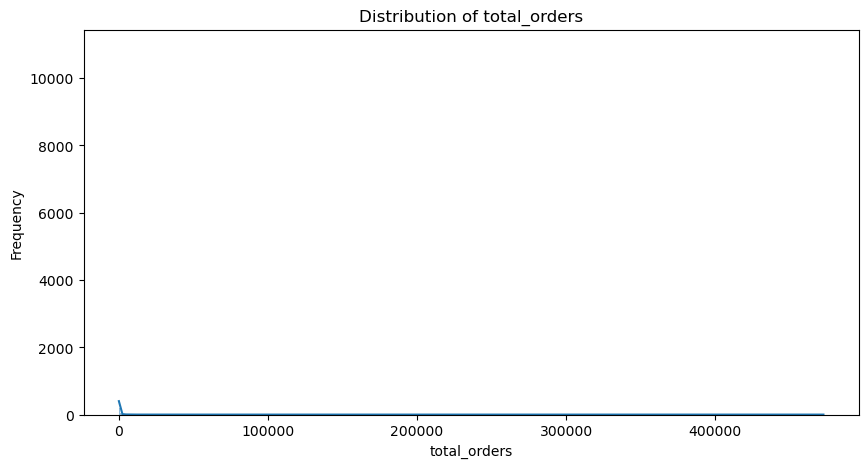

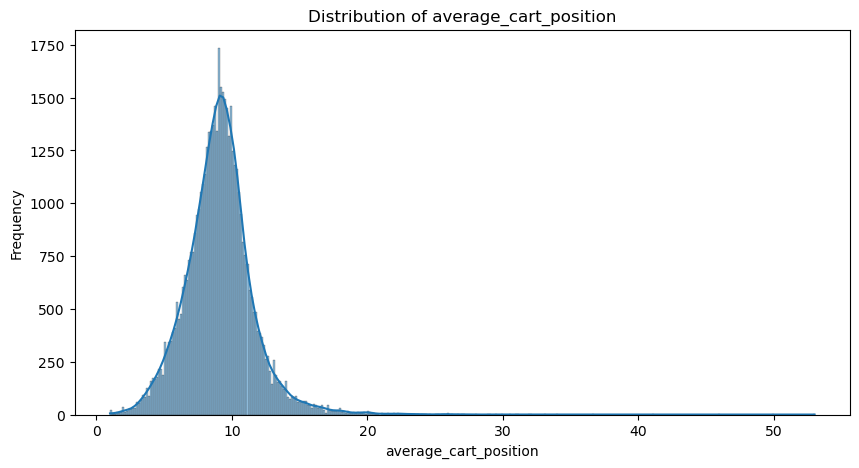

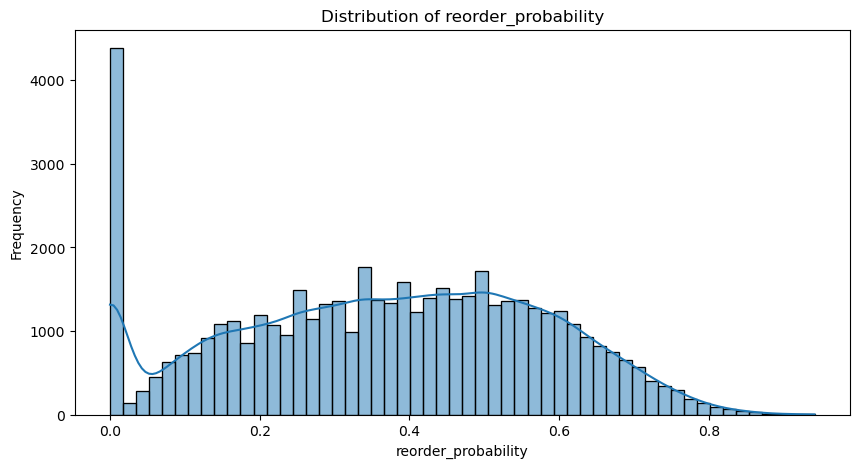

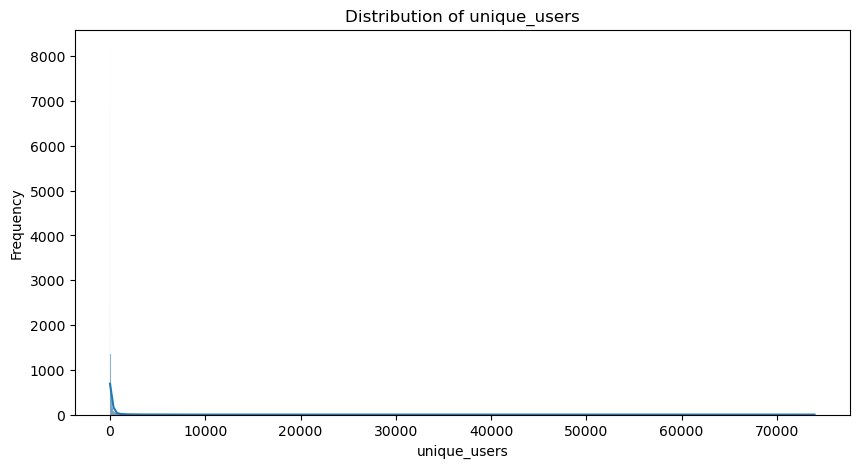

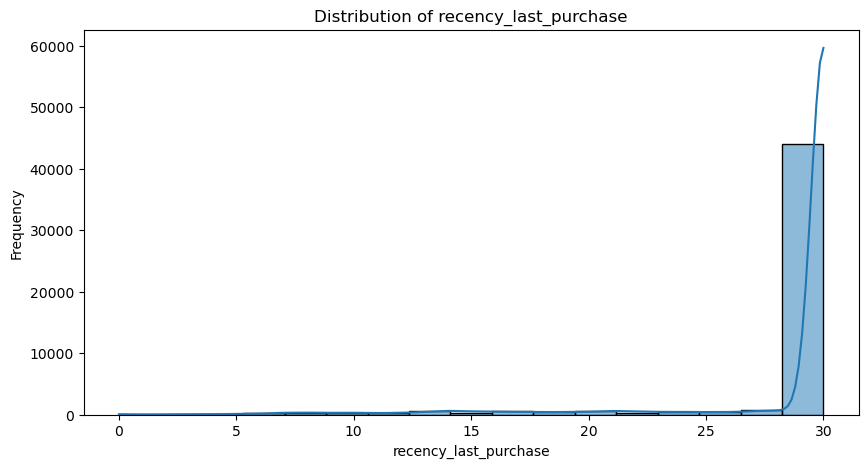

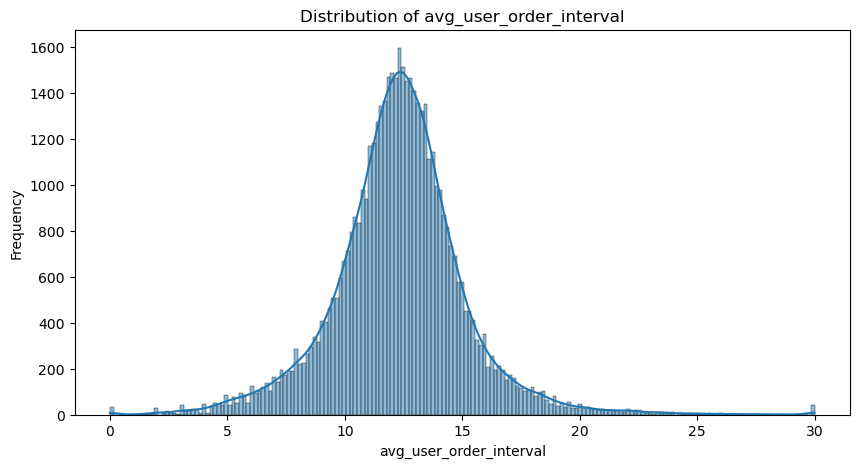

In [29]:
# Histogram for distribution of each feature
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(modeling_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()




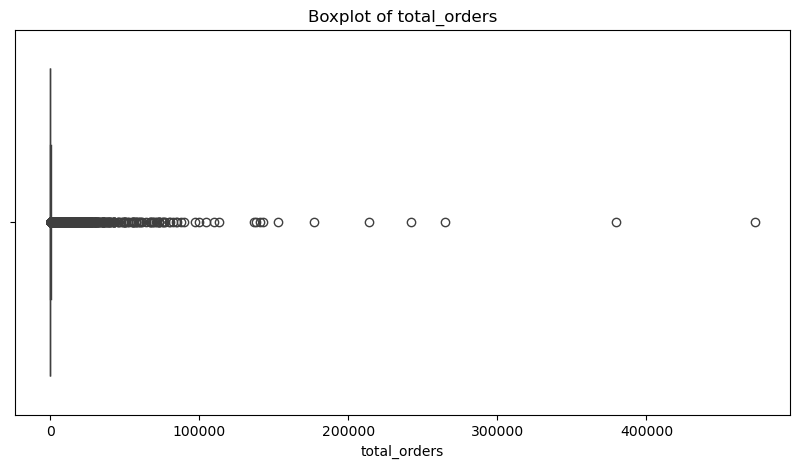

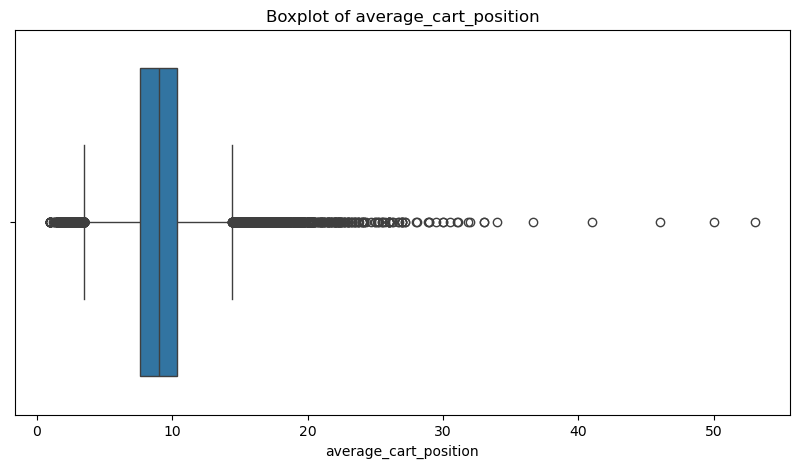

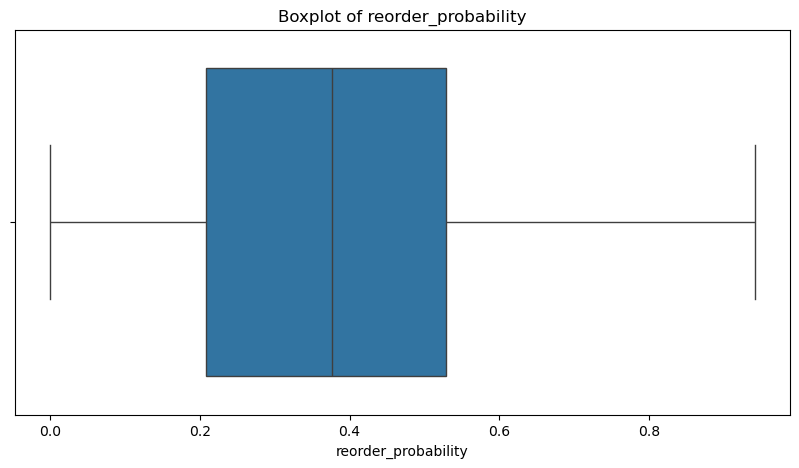

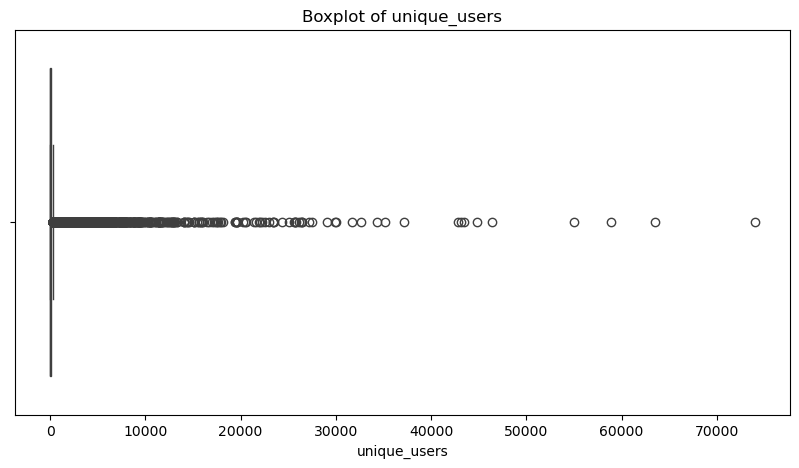

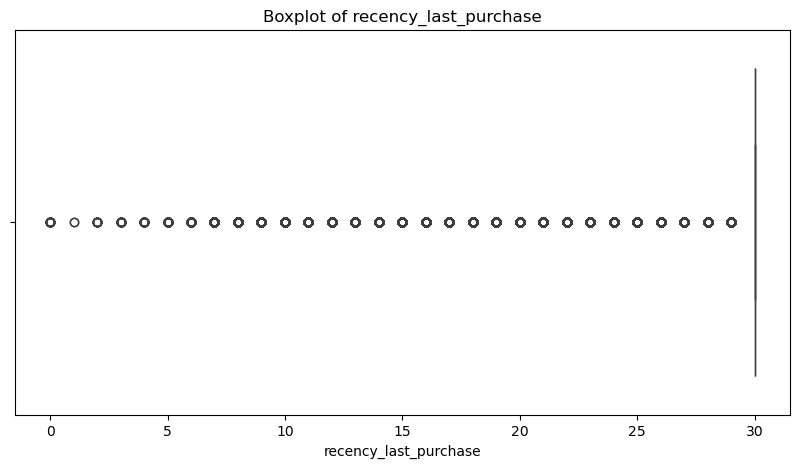

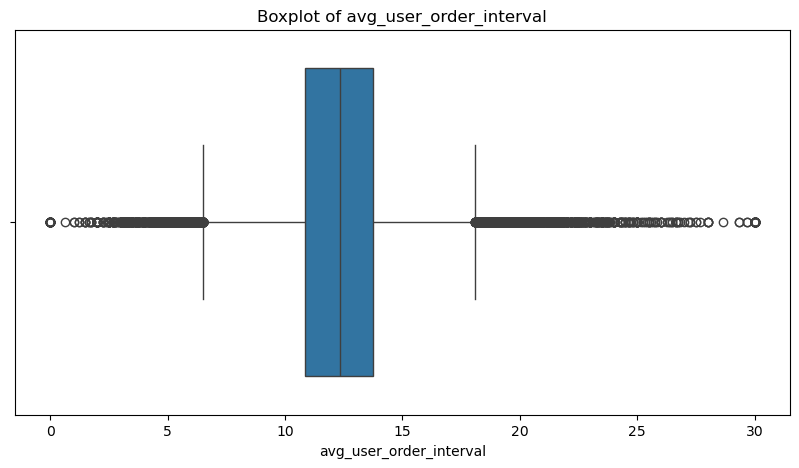

In [37]:
#Boxplots to detect outliers
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=modeling_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

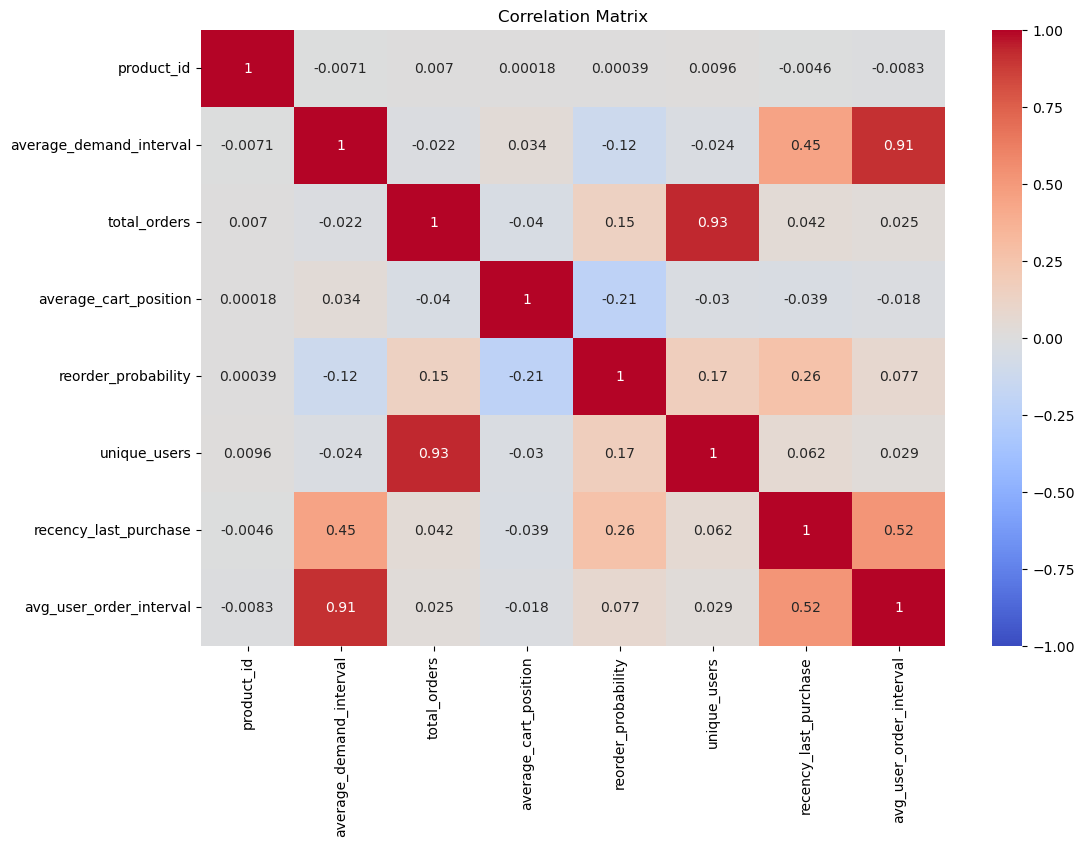

In [39]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = modeling_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

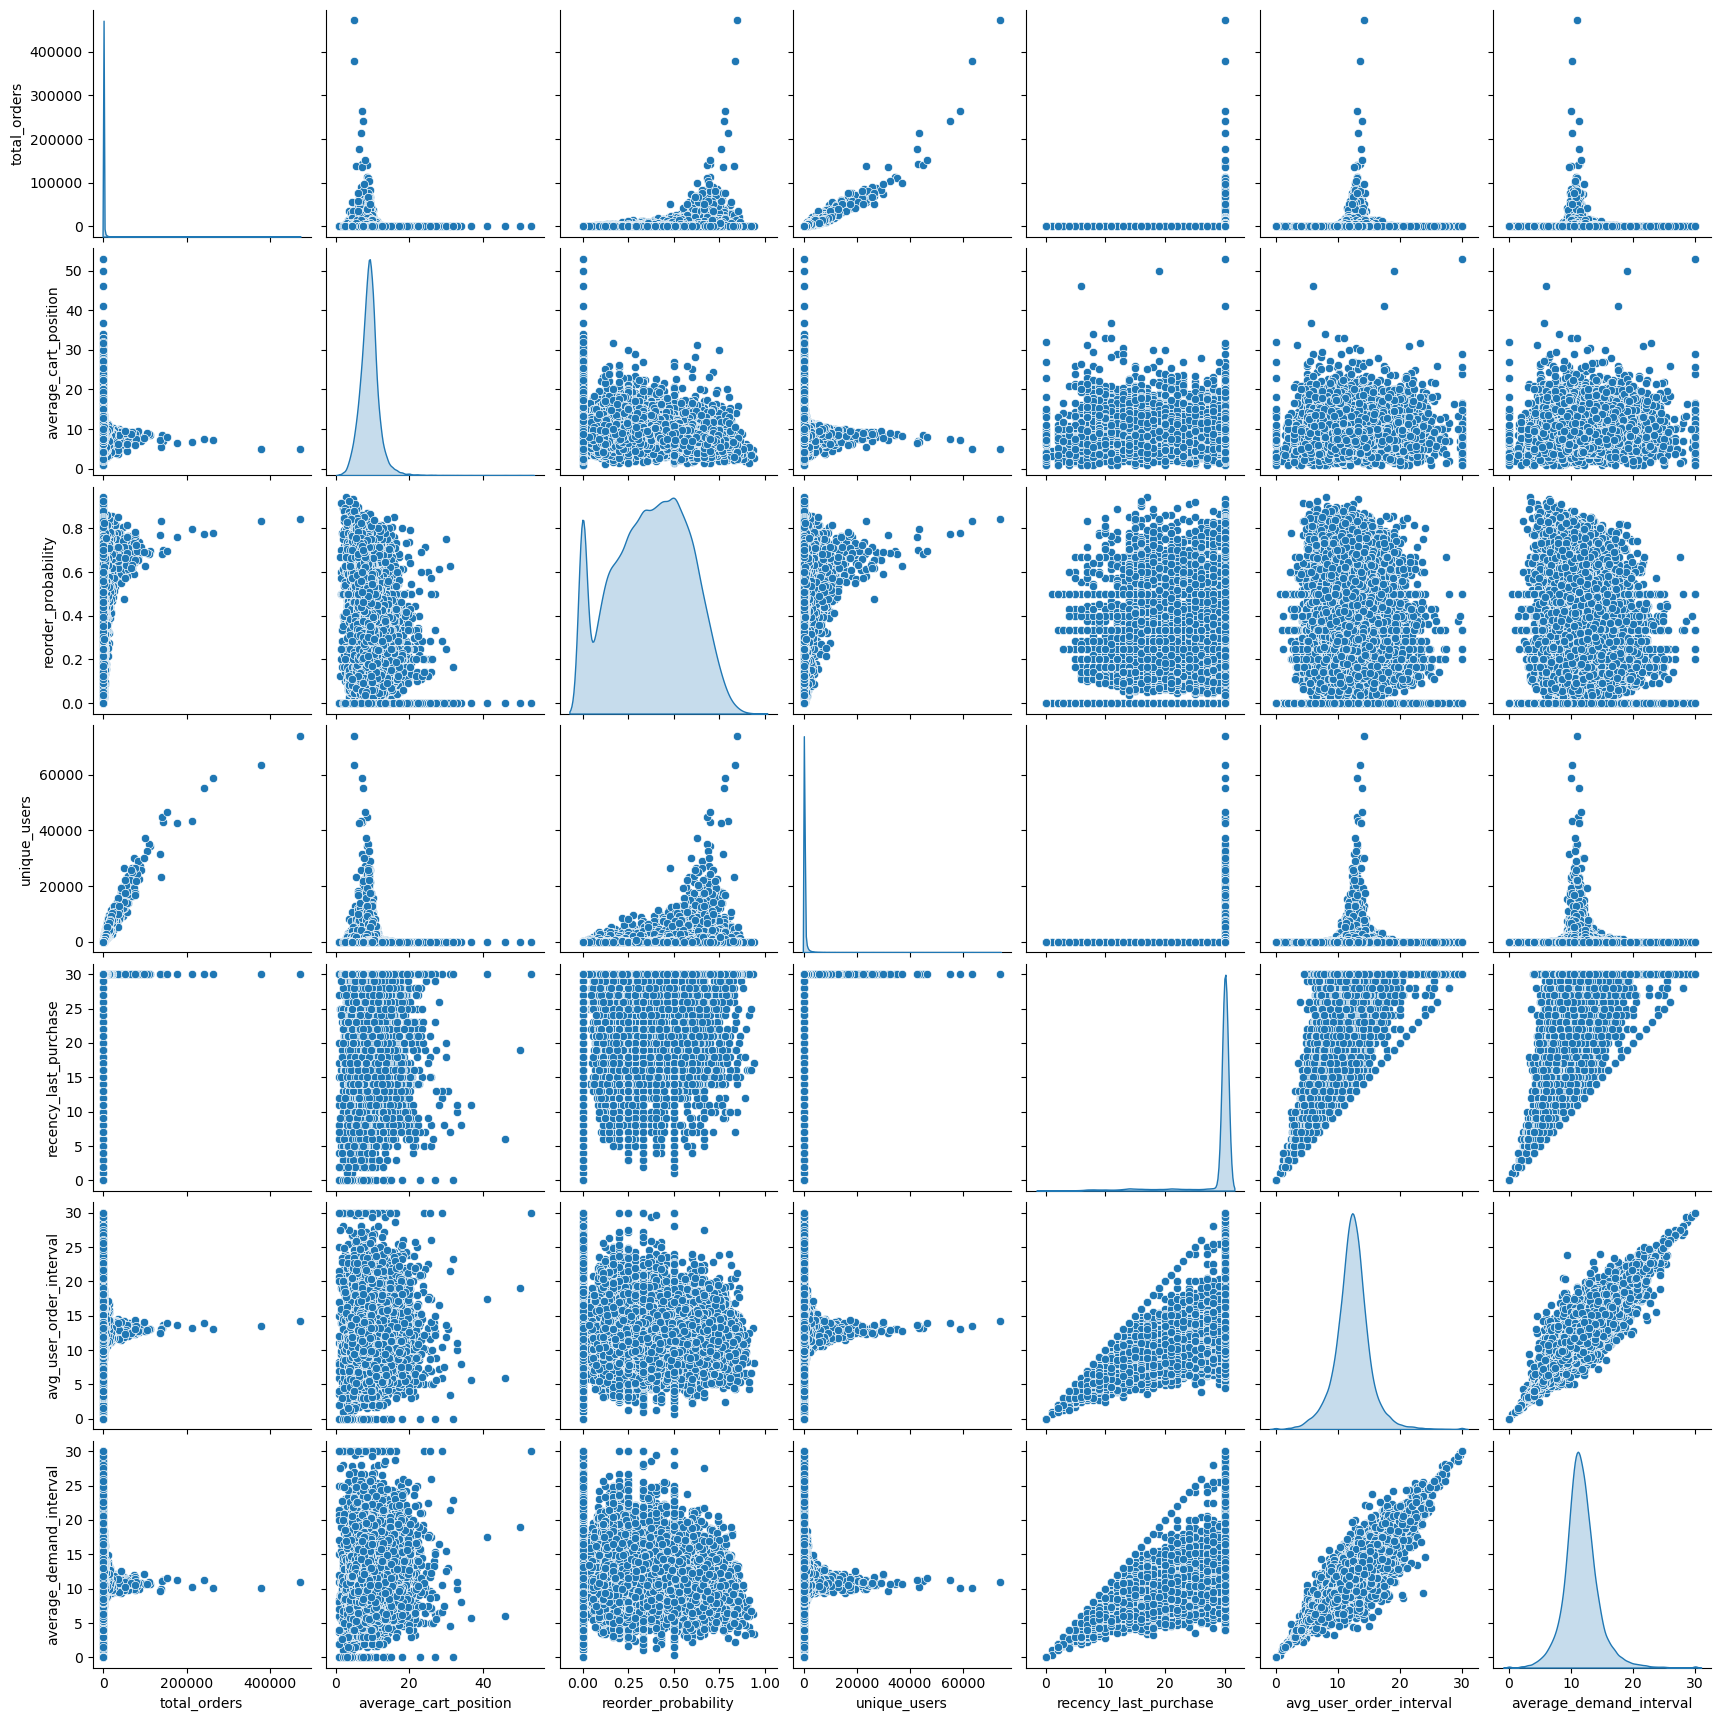

In [43]:
# Pair plot
sns.pairplot(modeling_df, vars=features + ['average_demand_interval'], diag_kind='kde')
plt.show()

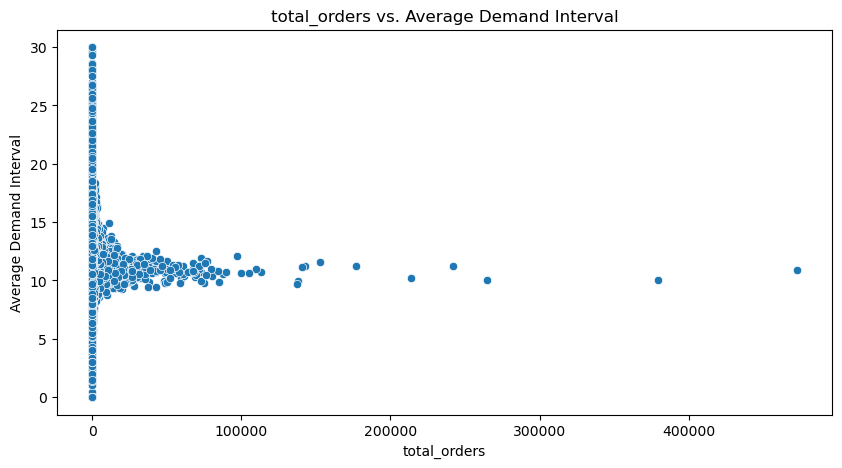

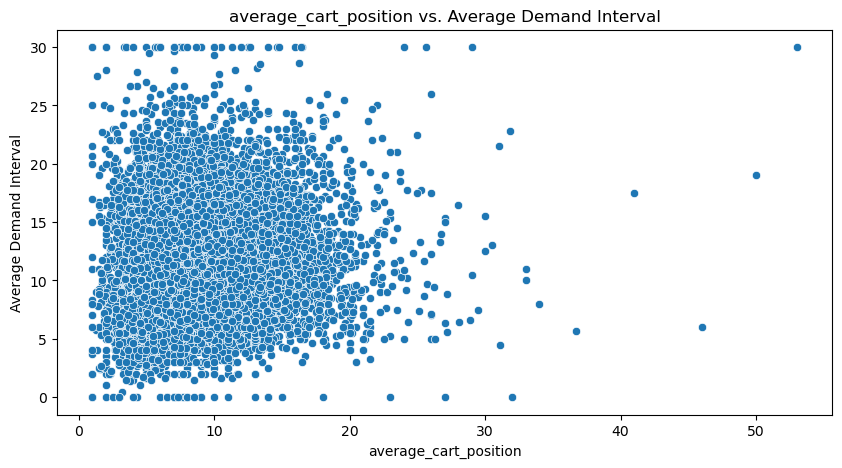

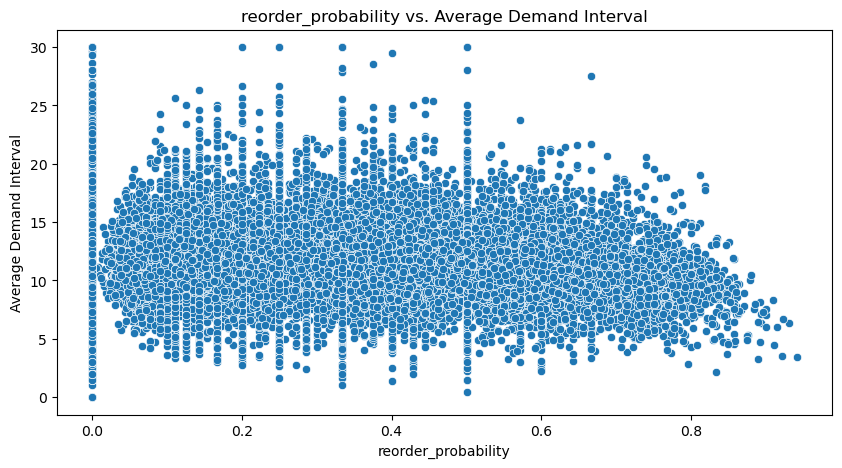

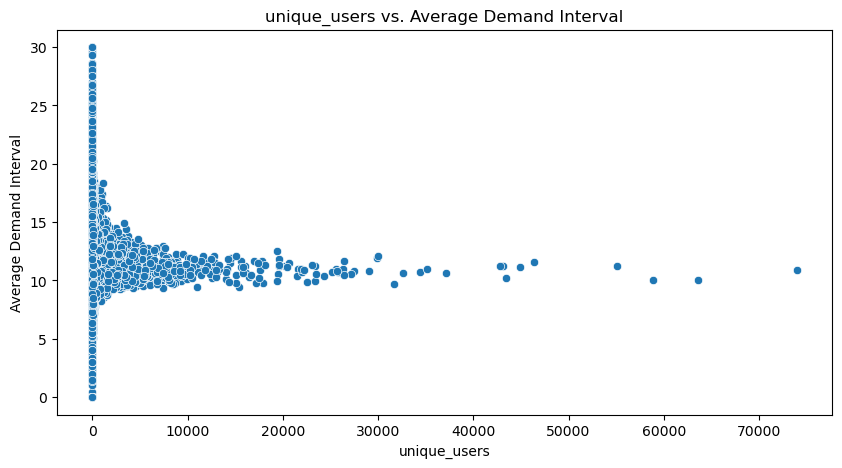

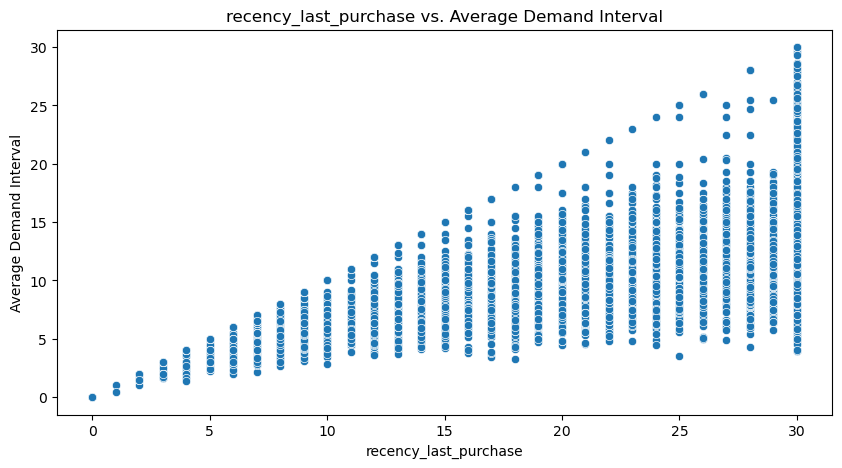

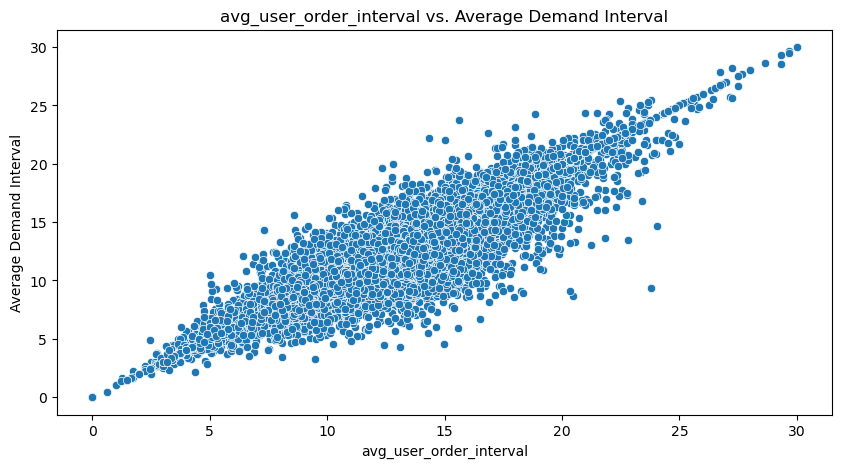

In [45]:
# Scatter plots with the target
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=modeling_df[feature], y=modeling_df['average_demand_interval'])
    plt.title(f'{feature} vs. Average Demand Interval')
    plt.xlabel(feature)
    plt.ylabel('Average Demand Interval')
    plt.show()

# Split the data

In [ ]:
features = ['total_orders', 'average_cart_position', 'reorder_probability', 
                    'unique_users', 'recency_last_purchase', 'avg_user_order_interval']
target = 'average_demand_interval'

X_train, X_test, y_train, y_test = train_test_split(modeling_df[features], modeling_df[target], test_size=0.2, random_state=42)


In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39741, 6) (9936, 6) (39741,) (9936,)


# Scale the data

In [ ]:
columns_to_scale = [ 'total_orders', 'average_cart_position', 'reorder_probability', 
                    'unique_users', 'recency_last_purchase', 'avg_user_order_interval']

scaler = StandardScaler()  # Or choose another scaler as needed

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
print(y_pred_linear)

[12.43251884 10.1033668   6.39855304 ...  9.49046838 12.55811898
 10.25350696]


In [ ]:
ridge_model = Ridge(alpha=1.0)  # we can change our aplha, but dispite different values of alpha we are getting the same results
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print(y_pred_ridge)

[12.4325047  10.10342754  6.39859466 ...  9.49054586 12.55808647
 10.25357024]


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print(y_pred_rf)

[12.41458626  9.91644057  6.73075517 ...  9.93590776 12.03413791
  9.96140595]


In [ ]:
svr_model = SVR(kernel='rbf')  # 'rbf' kernel for non-linear relationships
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
print(y_pred_svr)

[12.45193825 10.15166983  6.8171162  ...  9.66882448 12.24478698
 10.00594131]


In [ ]:
# a function that can print us the Model evaluations.
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R-squared (R²): {r2:.3f}\n")

# function call for each of the model
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")

--- Linear Regression ---
Mean Absolute Error (MAE): 0.691
Mean Squared Error (MSE): 1.065
Root Mean Squared Error (RMSE): 1.032
R-squared (R²): 0.866

--- Ridge Regression ---
Mean Absolute Error (MAE): 0.691
Mean Squared Error (MSE): 1.065
Root Mean Squared Error (RMSE): 1.032
R-squared (R²): 0.866

--- Random Forest Regressor ---
Mean Absolute Error (MAE): 0.657
Mean Squared Error (MSE): 1.023
Root Mean Squared Error (RMSE): 1.012
R-squared (R²): 0.872

--- Support Vector Regressor ---
Mean Absolute Error (MAE): 0.640
Mean Squared Error (MSE): 1.034
Root Mean Squared Error (RMSE): 1.017
R-squared (R²): 0.870



We can see tha t the Random Forest and SVR is giving us the exactly same results and also they are the best performing models when
we consider the Mean absolute error and R squared error .
The R squared error for Random forest is the highest implicating a 87.2% variance in the target variabe .
The SVR has lowest MAE , which means it has tge least average error b/w actual and pred values.

Now, let us further fine tune the Random Forest and SVR usinf GridSearchCV and RandomisedSearchCV and see if there is any further improvemnts in the performance

# Hyperparameter Tuning

In [ ]:
# Define the parameter grid to tune. Removed 'normalize'
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Keep other parameters
}

# Set up the LinearRegression model
linear_model = LinearRegression()

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Make predictions using the best model from GridSearchCV
best_linear_model = grid_search.best_estimator_
y_pred_linear_ht = best_linear_model.predict(X_test_scaled)

# Print predictions
print("Predictions:", y_pred_linear_ht)

Best Parameters: {'fit_intercept': True, 'positive': False}
Best Score (MSE): 1.0653793417009674
Predictions: [12.43251884 10.1033668   6.39855304 ...  9.49046838 12.55811898
 10.25350696]


In [ ]:
# Initialize PCA with desired number of components
pca = PCA(n_components=5)

# Fit PCA on training data and transform
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform test data using fitted PCA
X_test_pca = pca.transform(X_test_scaled)

# Initialize Ridge model
ridge_model = Ridge(alpha=0.01)  # Remove pca_n_components

# Fit Ridge model on PCA-transformed data
ridge_model.fit(X_train_pca, y_train)

# Predict on PCA-transformed test data
y_pred_ridge_ht= ridge_model.predict(X_test_pca)

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider for the best split
    'bootstrap': [True]  # Whether bootstrap samples are used when building trees
}

# Set up the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, warm_start=True)

# Set up RandomizedSearchCV with 3-fold cross-validation and parallel processing
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter combinations to try
    cv=3,  # Reduced cross-validation folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)
# Fit the grid search to the training data
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score (MSE):", -random_search.best_score_)


# Make predictions using the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_
y_pred_rf_ht = best_rf_model.predict(X_test_scaled)

# Print predictions
print("Predictions:", y_pred_rf_ht)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
81 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Score (MSE): 0.9936715606338041
Predictions: [12.68315958 10.17007525  6.6629522  ...  9.79348611 12.13914621
 10.22055814]


In [66]:
%pip install xgboost

  Using cached xgboost-2.1.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
   'epsilon': [0.1, 0.2],  # Epsilon parameter
    'kernel': ['linear', 'rbf'],  # Type of kernel to use
}

# Set up the SVR model with RBF kernel
# Create the XGBoost model
xgb_model = xgb.XGBRegressor()

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Make predictions using the best model from GridSearchCV
best_svr_model = grid_search.best_estimator_
y_pred_svr_ht = best_svr_model.predict(X_test_scaled)

# Print predictions
print("Predictions:", y_pred_svr_ht)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:32:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:32:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:32:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:32:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/p

Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Best Score (MSE): 1.0459960631636416
Predictions: [12.545793 10.268658  6.685754 ...  9.207369 12.484831 10.261287]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:32:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:32:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# a function that can print us the Model evaluations.
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R-squared (R²): {r2:.3f}\n")

# function call for each of the model
evaluate_model(y_test, y_pred_linear_ht, "Linear Regression")
evaluate_model(y_test, y_pred_ridge_ht, "Ridge Regression")
evaluate_model(y_test, y_pred_rf_ht, "Random Forest Regressor")
evaluate_model(y_test, y_pred_svr_ht, "Extreme Gradient Boosting")

--- Linear Regression ---
Mean Absolute Error (MAE): 0.691
Mean Squared Error (MSE): 1.065
Root Mean Squared Error (RMSE): 1.032
R-squared (R²): 0.866

--- Ridge Regression ---
Mean Absolute Error (MAE): 0.691
Mean Squared Error (MSE): 1.065
Root Mean Squared Error (RMSE): 1.032
R-squared (R²): 0.866

--- Random Forest Regressor ---
Mean Absolute Error (MAE): 0.654
Mean Squared Error (MSE): 0.995
Root Mean Squared Error (RMSE): 0.997
R-squared (R²): 0.875

--- Extreme Gradient Boosting ---
Mean Absolute Error (MAE): 0.665
Mean Squared Error (MSE): 1.051
Root Mean Squared Error (RMSE): 1.025
R-squared (R²): 0.868

